In [1]:
##basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

## models
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

In [5]:
data = pd.read_csv("../../Clustering/Data/Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.shape

(200, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
data['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

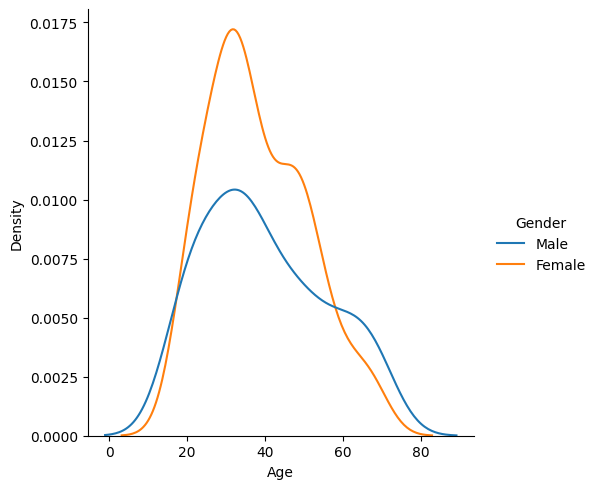

In [ ]:
sns.displot(data, x = 'Age',hue='Gender', kind='kde')

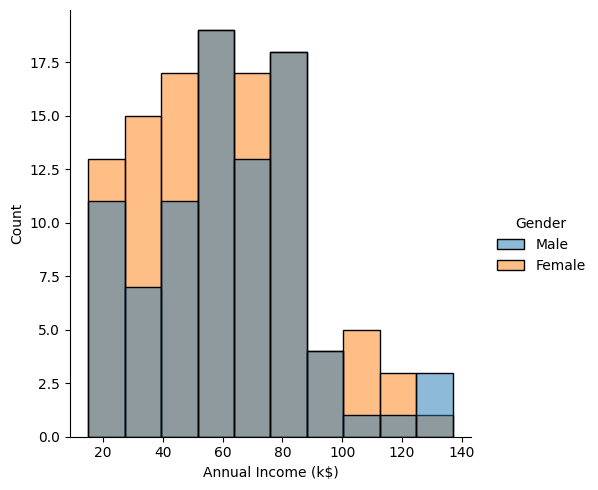

In [ ]:
sns.displot(data, x = 'Annual Income (k$)',hue='Gender', kind='hist')

In [ ]:
data.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [ ]:
data.duplicated().any()

False

In [ ]:
laencoder = LabelEncoder()
data['Gender'] = laencoder.fit_transform(data['Gender'])

In [ ]:
X = data.drop(['CustomerID'], axis=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [ ]:
def plot_elbow(data, features, max_clusters=10):
    wcss = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
        kmeans.fit(data[:, features])
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(10, 5))
    plt.plot(range(1, max_clusters + 1), wcss, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()



In [ ]:
def kmeans_clustering(data_X, optimal_k):
    kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_X)
    y_kmeans = kmeans.predict(data_X)
    centroids = kmeans.cluster_centers_
    print('Centroids:', centroids)
    silhouette_avg = silhouette_score(data_X, kmeans.labels_)
    print(f'Silhouette Score for k={optimal_k}: {silhouette_avg:.2f}')
    db_index = davies_bouldin_score(data, kmeans.labels_)
    print(f'Davies-Bouldin Index: {db_index:.2f}')
    return y_kmeans, centroids

In [ ]:
def visualize_clusters(data_X, y_kmeans, centroids):
    plt.figure(figsize=(10, 5))
    plt.title('K-means Clustering with Centroids')
    sns.scatterplot(x=data_X[:, 0], y=data_X[:, 1], hue=y_kmeans, palette='viridis', legend='full')

    # Plot centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=300, c='red', label='Centroids')
    plt.legend()
    plt.show()


Gender and Spending Score

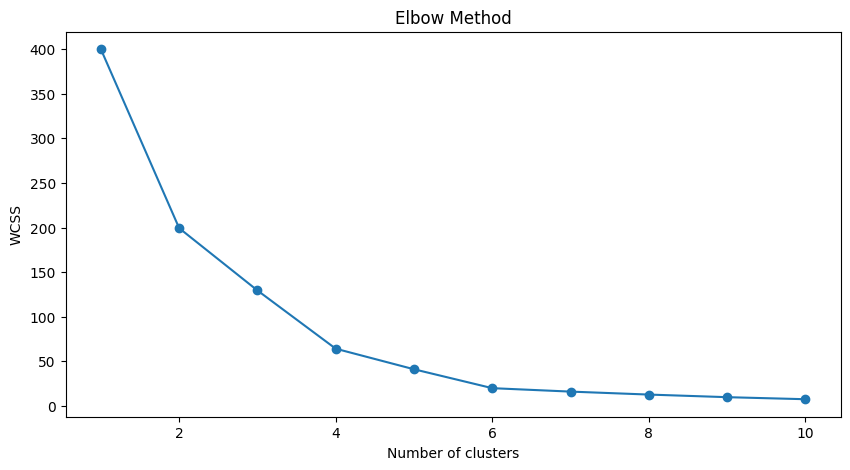

In [ ]:
plot_elbow(scaled_data, [0, 3])
data_1 = scaled_data[:,[0,3]]

In [ ]:
optimal_k =4
y_kmeans_1,centroids_1 = kmeans_clustering(data_1, optimal_k)

Centroids: [[ 1.12815215  0.64141845]
 [-0.88640526 -0.4956569 ]
 [ 1.12815215 -1.18839648]
 [-0.88640526  1.11703933]]
Silhouette Score for k=4: 0.57
Davies-Bouldin Index: 6.20


In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


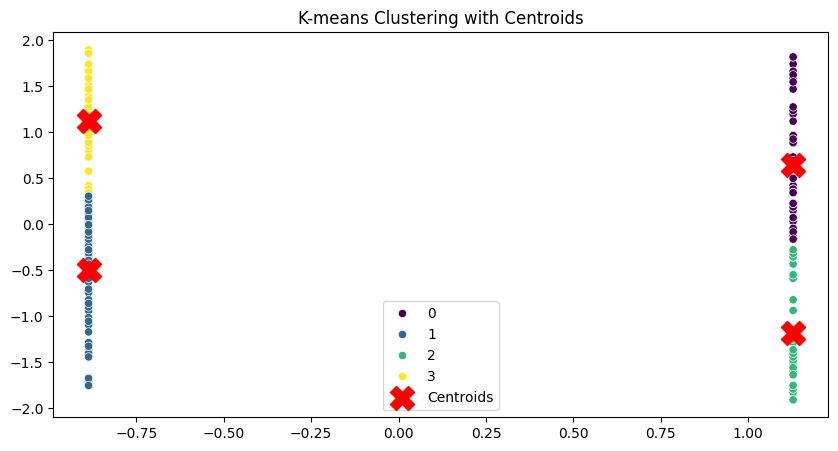

In [ ]:
visualize_clusters(data_1, y_kmeans_1, centroids_1)

Age and Spending


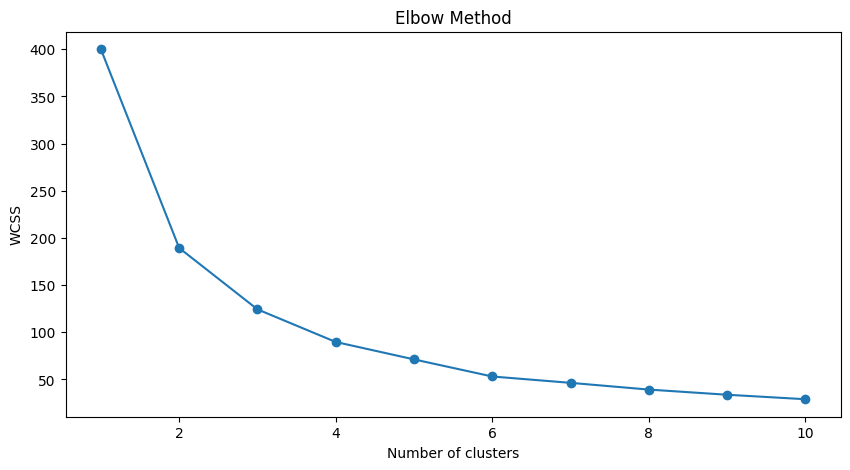

In [ ]:
plot_elbow(scaled_data, [1, 3])
data_2 = scaled_data[:,[1,3]]

In [ ]:
optimal_k_2 = 4
y_kmeans_2, centroids_2 = kmeans_clustering(data_2, optimal_k_2)

Centroids: [[-0.61415725  1.14971545]
 [ 1.22927178 -0.06558366]
 [-0.8346466  -0.39442706]
 [ 0.62833625 -1.36651894]]
Silhouette Score for k=4: 0.44


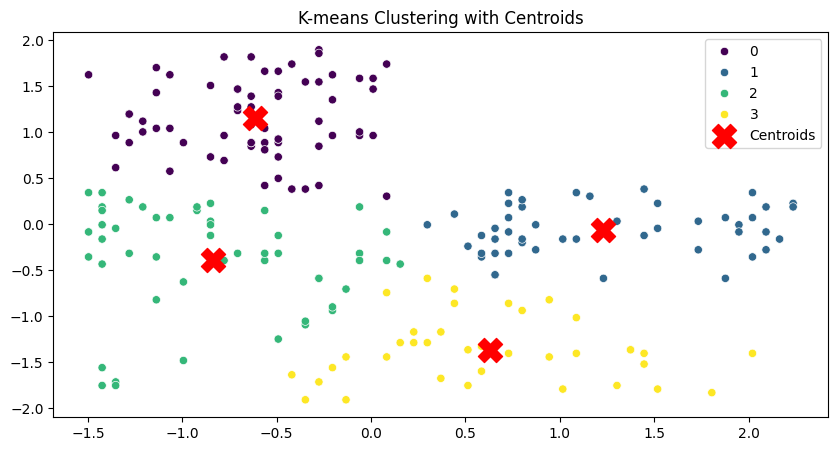

In [ ]:
visualize_clusters(data_2, y_kmeans_2, centroids_2)

Annual Income (k$) and Spending Score

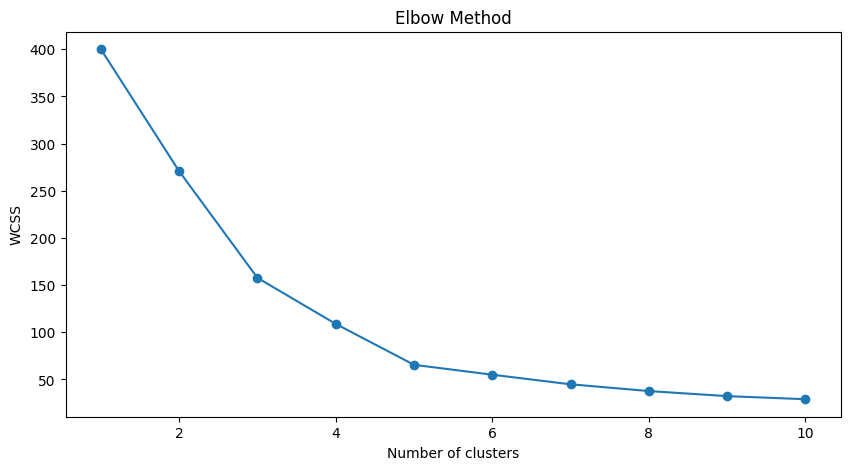

In [ ]:
plot_elbow(scaled_data, [2, 3])
data_3 = scaled_data[:,[2,3]]

In [ ]:
optimal_k_3 = 5
y_kmeans_3, centroids_3 = kmeans_clustering(data_3, optimal_k_3)

Centroids: [[ 1.05500302 -1.28443907]
 [-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [-1.32954532  1.13217788]
 [-1.30751869 -1.13696536]]
Silhouette Score for k=5: 0.55


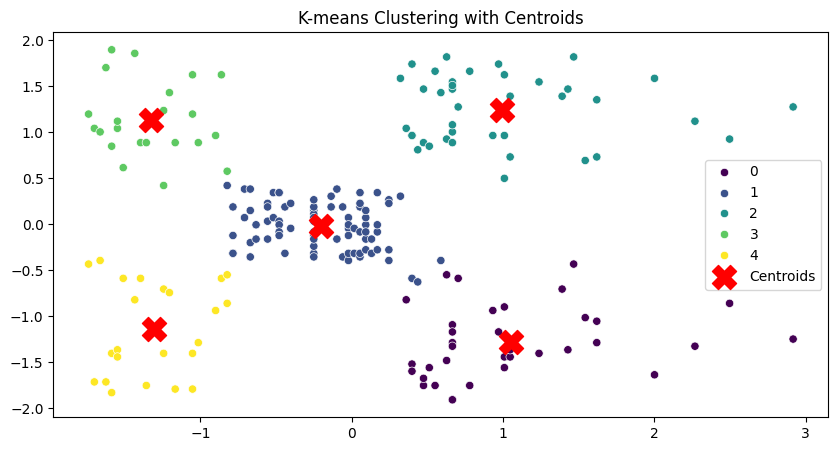

In [ ]:
visualize_clusters(data_3, y_kmeans_3, centroids_3)